In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset from a CSV file
data = pd.read_csv("../dataset_small (1).csv")
# data['status'] = data['status'].replace({'legitimate': 0, 'phishing': 1})

# Extract features (X) and target labels (y) from the dataset
X = data.iloc[:, :-1]  # Assuming the last column is the target variable
# X = data.drop('url', axis=1)
y = data.iloc[:, -1]


#printing the shape of the dataset
print("Shape of the dataset: ", data.shape)
print(data.head())

In [11]:
# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize the KNN classifier with a specific 'k' value
k = 3  # You can choose any appropriate value for 'k'
knn = KNeighborsClassifier(n_neighbors=k)

In [13]:
# Fit the KNN model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [15]:
# # Calculate the accuracy, precision, recall, and F1 score
# accuracy = accuracy_score(y_test, y_pred) * 100
# precision = precision_score(y_test, y_pred, average='weighted') * 100
# recall = recall_score(y_test, y_pred, average='weighted') * 100
# f1 = f1_score(y_test, y_pred, average='weighted') * 100

# # Create a DataFrame to display the results in a tabular format
# results = pd.DataFrame({
#     'Accuracy (%)': [accuracy],
#     'Precision (%)': [precision],
#     'Recall (%)': [recall],
#     'F1 Score (%)': [f1]
# })

# # Print the results
# print(results)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8583851990792054
Precision: 0.858793324775353
Recall: 0.8726561226153595
F1 Score: 0.865669227658714


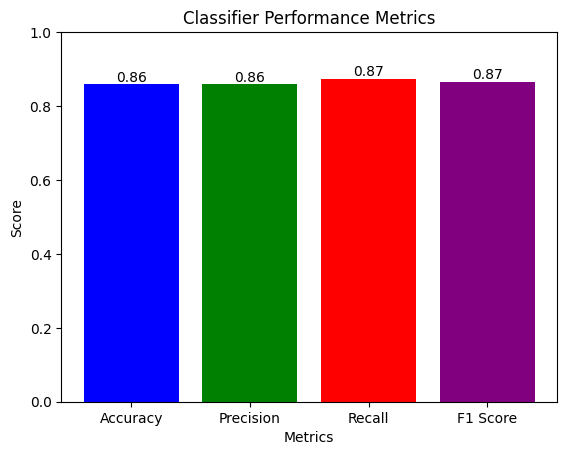

In [17]:
# Create a bar chart to visualize the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Classifier Performance Metrics')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for readability

# Display the scores on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

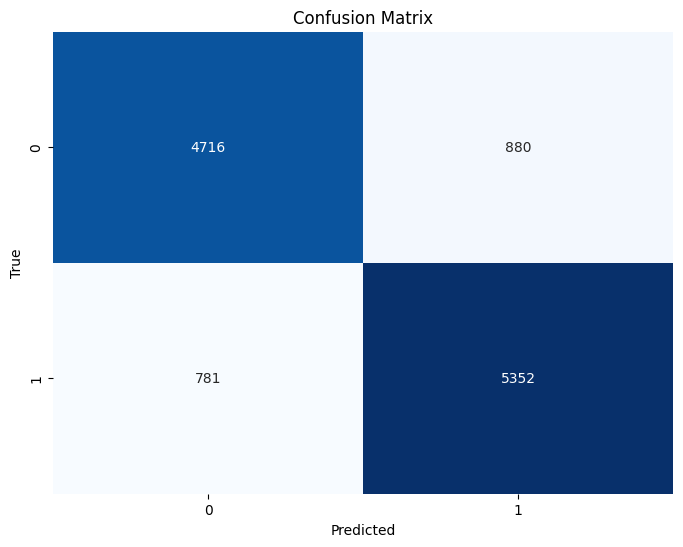

In [18]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
